## DATA CLEANING

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import datetime

In [2]:
data = pd.read_csv('online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())
    
    
data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39    

In [5]:
#removing missing value
data.dropna(subset="CustomerID",axis=0,inplace=True)

In [6]:
print("Missing values in each column after cleaning customerID :\n",data.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
#loại hoá đơn ngừng
data = data[~data.InvoiceNo.str.startswith('C',na=False)]

In [8]:
#Loại duplicates
data.drop_duplicates(keep='first', inplace=True)

In [9]:
#check price,quantity<0
print("unitprice<0:",(data.UnitPrice<0).sum())
print("quantity<0:",(data.Quantity<0).sum())

unitprice<0: 0
quantity<0: 0


##cleaning outliers

In [10]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

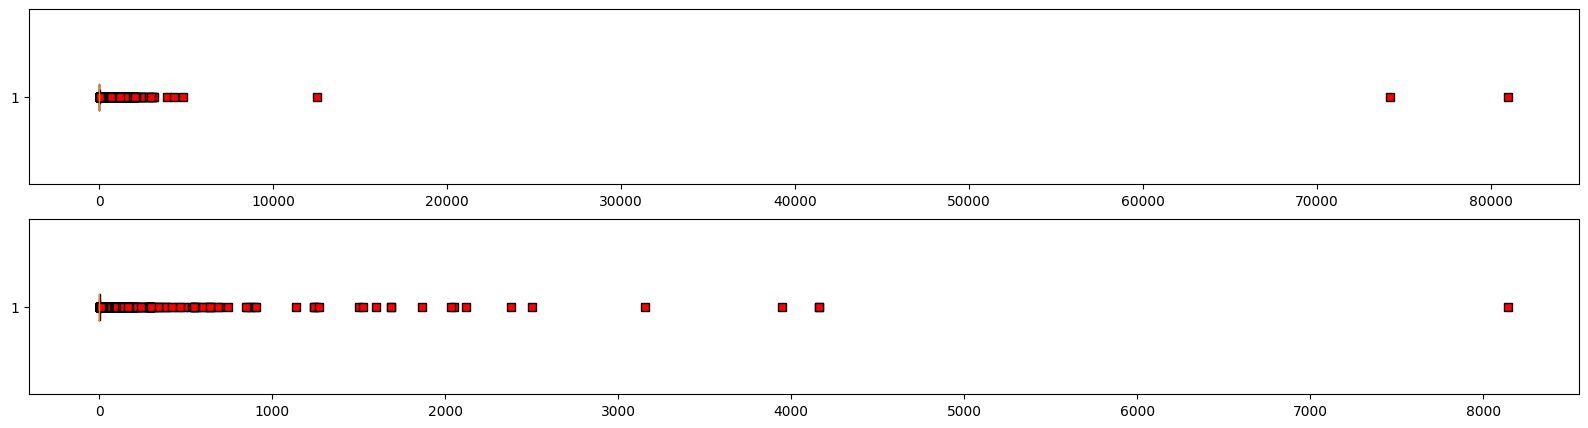

In [11]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [12]:
# Applying the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "UnitPrice")

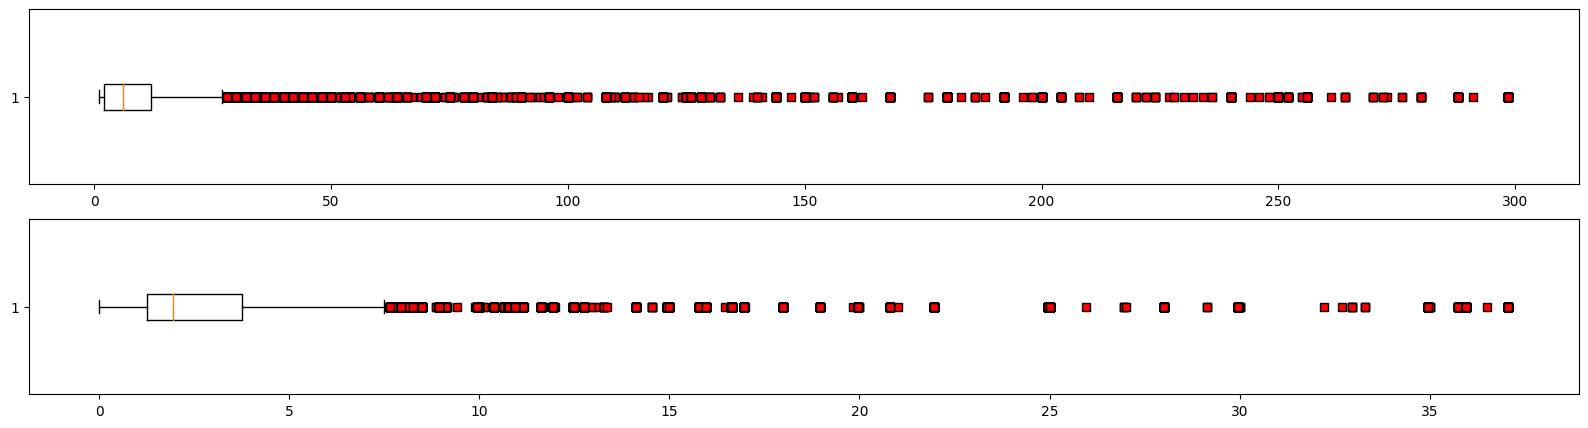

In [13]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

## Measuring

In [14]:
#Tính R
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])

In [15]:
#Lấy ngày lớn nhất trong InvD +1
current_date= max(data['InvoiceDate']) + datetime.timedelta(days=1)

In [16]:
#Tính Monetary
data["Revenue"]= data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
#Groupby CustomerID để tính R, F, M
dt_customers = data.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date-x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'})

In [18]:
dt_customers.head()

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,326,1,310.44
12347.0,2,182,4310.00
12348.0,75,31,1770.78
12349.0,19,73,1491.72
12350.0,310,17,331.46


In [19]:
dt_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Revenue':'Monetary'}, inplace=True)

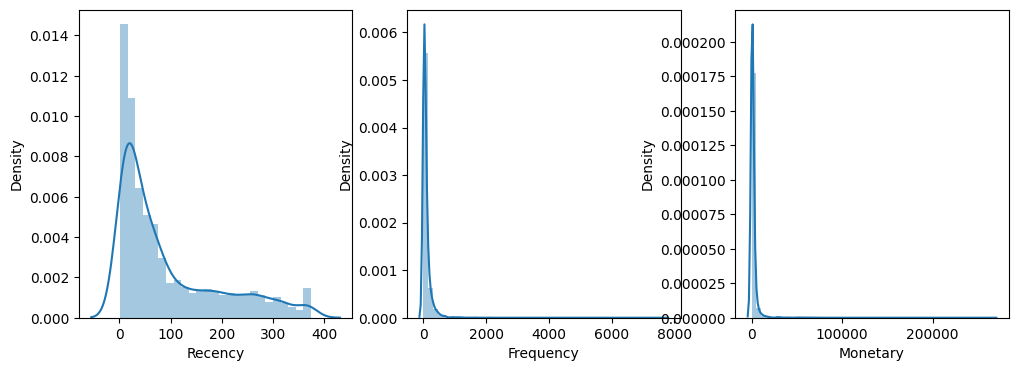

In [20]:
#Ve phan phoi de kt
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(dt_customers['Recency'], ax= ax[0])
sns.distplot(dt_customers['Frequency'], ax= ax[1])
sns.distplot(dt_customers['Monetary'], ax= ax[2])
plt.show()

In [21]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(dt_customers[x], ax=ax[0,0])
    sns.distplot(np.log(dt_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(dt_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(dt_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(dt_customers[x].skew().round(2))
    print(np.log(dt_customers[x]).skew().round(2))
    print(np.sqrt(dt_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(dt_customers[x])[0]).skew().round(2))

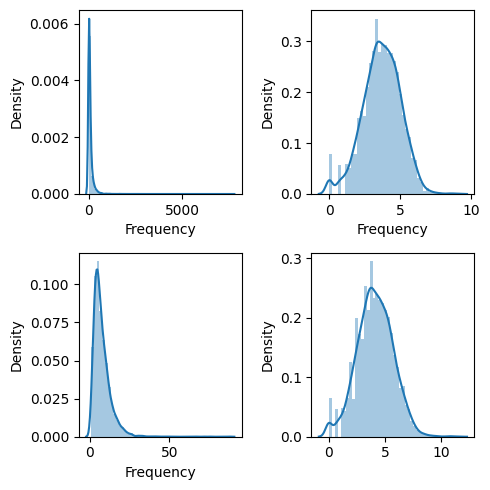

18.04
-0.22
3.23
0.0


In [22]:
analyze_skewness('Frequency')

In [23]:
#Tien hanh transform dulieu
dt_customers_t = pd.DataFrame()
dt_customers_t['Recency'] = stats.boxcox(dt_customers['Recency'])[0]
dt_customers_t['Frequency'] = stats.boxcox(dt_customers['Frequency'])[0]
dt_customers_t['MonetaryValue'] = pd.Series(np.cbrt(dt_customers['Monetary'])).values
dt_customers_t.head(10)

,Recency,Frequency,MonetaryValue
0,10.033861,0.000000,6.771100
1,0.737066,5.971458,16.273929
2,6.457940,3.757746,12.098222
3,3.855009,4.803628,11.426041
4,9.895535,3.051267,6.920599
5,4.988819,4.994372,12.065246
6,8.791459,1.437191,4.464745
7,9.122224,4.518178,10.257955
8,8.913659,2.742821,7.716085
9,4.180744,4.539276,14.113750


In [24]:
#Scale dulieu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dt_customers_t)

dt_customers_t = scaler.transform(dt_customers_t)

In [25]:
pd.DataFrame(dt_customers_t).head()

,0,1,2
0,1.624936,-2.573709,-0.630469
1,-1.841752,1.177722,1.370728
2,0.291508,-0.212991,0.491367
3,-0.679100,0.444060,0.349813
4,1.573355,-0.656821,-0.598986


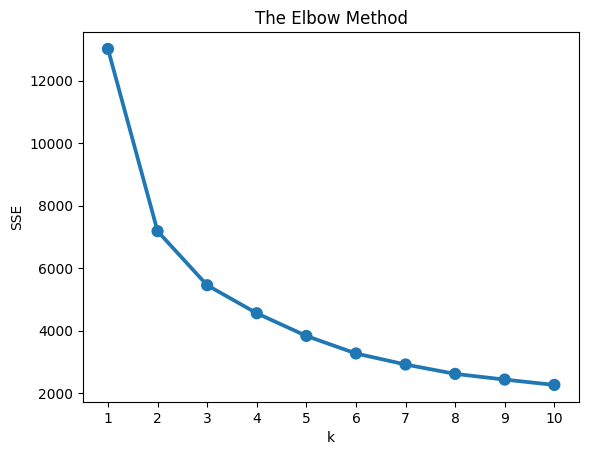

In [26]:
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dt_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [33]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(dt_customers_t)

KMeans(n_clusters=3, random_state=42)

In [34]:
dt_customers['Cluster'] = model.labels_
dt_customers.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,310.44,2
12347.0,2,182,4310.00,1
12348.0,75,31,1770.78,0
12349.0,19,73,1491.72,0
12350.0,310,17,331.46,2


In [35]:
dt_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)
     

,Recency,Frequency,Monetary
Cluster,,,
0,42.78,65.20,994.49
1,19.53,302.03,7241.94
2,184.70,19.34,374.39


## NHẬN XÉT

# Khách hàng có thể chia thành 3 nhóm: khách hàng mới - mua hàng gần đây nhưng số tổng tiêu dùng còn ít (cluster = 0), khách hàng thân thiết - mua hàng gần đây, thường xuyên và tổng tiêu dùng lớn (cluster = 1), khách hàng cũ - không thường xuyên mua, không có giao dịch gần đây và tổng tiêu dùng ít(cluster = 2)
# Dựa vào đây có thể tìm hiểu sâu về lý do khách hàng cũ không lựa chọn mua nữa để cải thiện doanh số. Đồng thời quan tâm đặc biệt đến các khách hàng thân thiết, khách hàng mới, ví dụ tặng thêm voucher tri ân hoặc gửi voucher nhân dịp sinh nhật của khách hàng để tăng hảo cảm của khách hàng đối với doanh nghiệp.